In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [65]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [66]:
df = pd.read_csv(r"C:\Users\VARSHINI\Exam_Score_Prediction.csv")

print("✓ Dataset loaded successfully!")
print("Dataset shape:", df.shape)
df.head()


✓ Dataset loaded successfully!
Dataset shape: (20000, 13)


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [67]:
print("\n📊 Dataset Info:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum())



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB
None

🔍 Missing Values:
student_id          0
age                 0
gender              0
course           

In [68]:
le = LabelEncoder()

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,1,6,2.78,92.9,1,7.4,2,0,1,1,58.9
1,2,23,2,5,3.37,64.8,1,4.6,0,3,2,2,54.8
2,3,22,1,1,7.88,76.8,1,8.5,2,0,0,2,90.3
3,4,20,2,6,0.67,48.4,1,5.8,0,3,1,2,29.7
4,5,20,0,6,0.89,71.6,1,9.8,2,0,1,2,43.7


In [69]:
X = df.drop('exam_score', axis=1)
y = df['exam_score']

print(f"✓ Number of features: {X.shape[1]}")
print("✓ Target variable: exam_score")


✓ Number of features: 12
✓ Target variable: exam_score


In [70]:
print("\n📈 Exam Score Statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"Std Dev: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")



📈 Exam Score Statistics:
Mean: 62.51
Median: 62.60
Std Dev: 18.91
Min: 19.60
Max: 100.00


In [71]:
correlations = df.corr()['exam_score'].sort_values(ascending=False)

print("\n🔗 Top Correlated Features with Exam Score:")
print(correlations[1:11])



🔗 Top Correlated Features with Exam Score:
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
exam_difficulty     0.003432
student_id          0.003269
gender             -0.000428
course             -0.000448
internet_access    -0.007826
facility_rating    -0.071879
Name: exam_score, dtype: float64


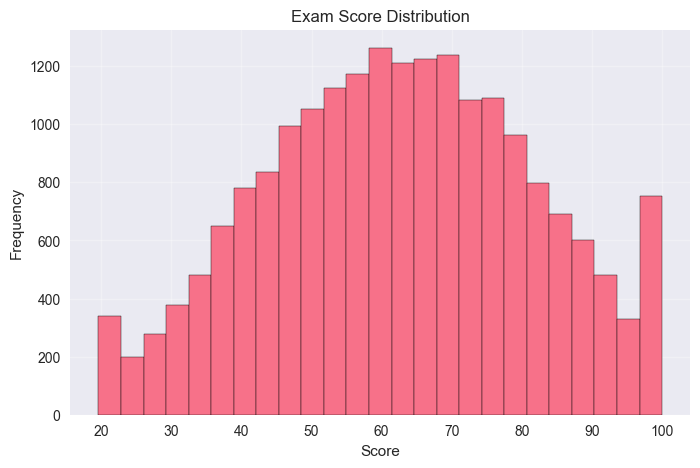

In [72]:
plt.figure(figsize=(8,5))
plt.hist(y, bins=25, edgecolor='black')
plt.title('Exam Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


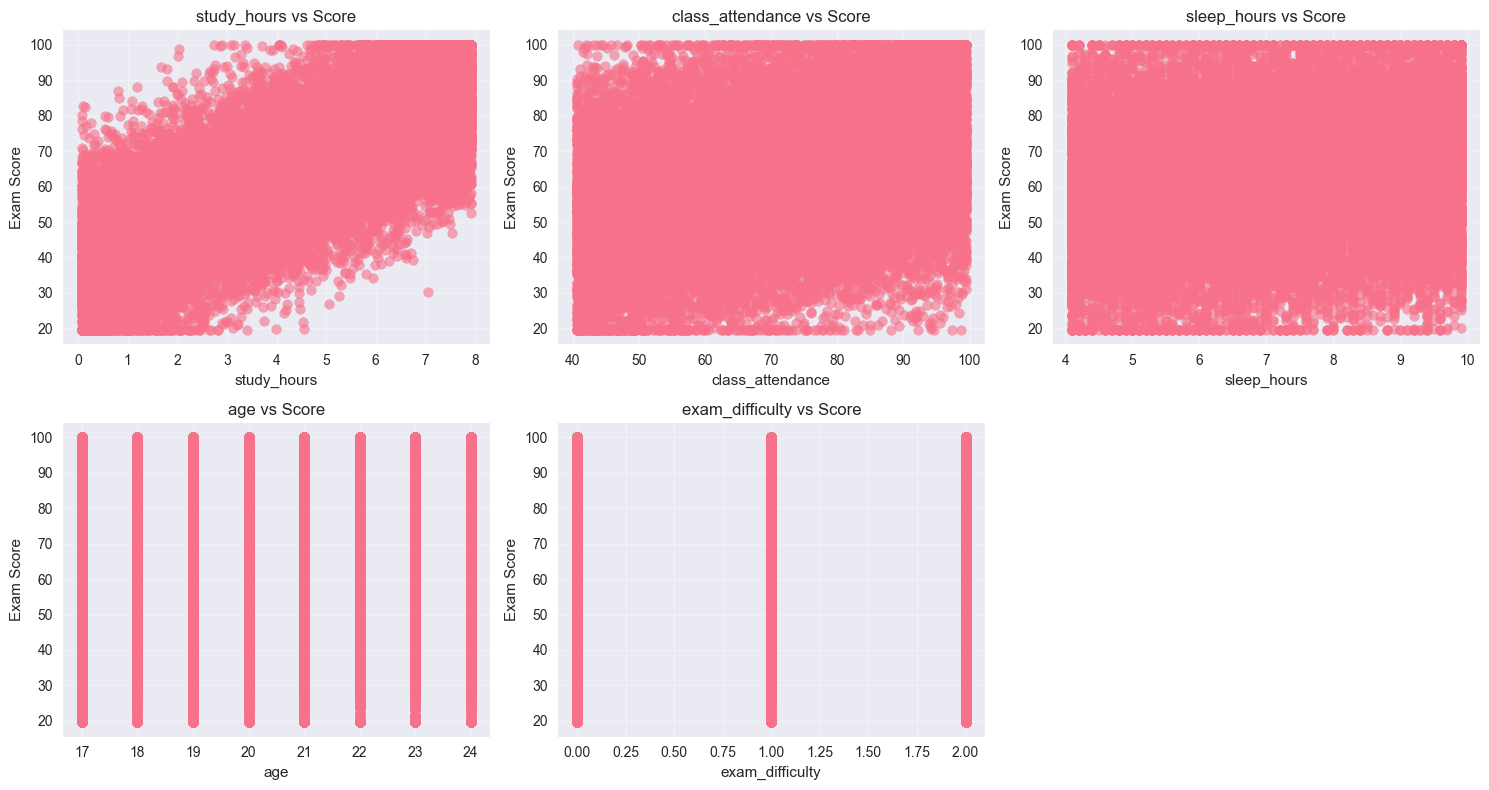

In [73]:
top_features = correlations[1:6].index

plt.figure(figsize=(15,8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2,3,i)
    plt.scatter(df[feature], y, alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Exam Score')
    plt.title(f'{feature} vs Score')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 16000
Testing samples: 4000


In [75]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled")


✓ Features scaled


In [76]:
selector = SelectKBest(score_func=f_regression, k=8)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("🎯 Selected Features:", list(selected_features))


🎯 Selected Features: ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [77]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

print("✓ Linear Regression Model Trained")


✓ Linear Regression Model Trained


In [78]:
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)


In [79]:
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {name} Performance")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    return r2


In [80]:
train_r2 = evaluate_model(y_train, y_train_pred, "Training")
test_r2 = evaluate_model(y_test, y_test_pred, "Testing")



📊 Training Performance
R² Score: 0.6695
RMSE: 10.87
MAE: 8.72

📊 Testing Performance
R² Score: 0.6674
RMSE: 10.91
MAE: 8.80


In [81]:
print("\n🔍 Overfitting Check:")
print(f"R² Difference: {train_r2 - test_r2:.4f}")



🔍 Overfitting Check:
R² Difference: 0.0021


In [82]:
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n🎯 Feature Importance:")
print(feature_importance)



🎯 Feature Importance:
            Feature  Coefficient
1       study_hours    13.572961
2  class_attendance     5.911198
5      study_method    -2.907521
3       sleep_hours     2.489576
4     sleep_quality    -1.915910
6   facility_rating    -1.483699
7   exam_difficulty     0.130900
0               age     0.017491


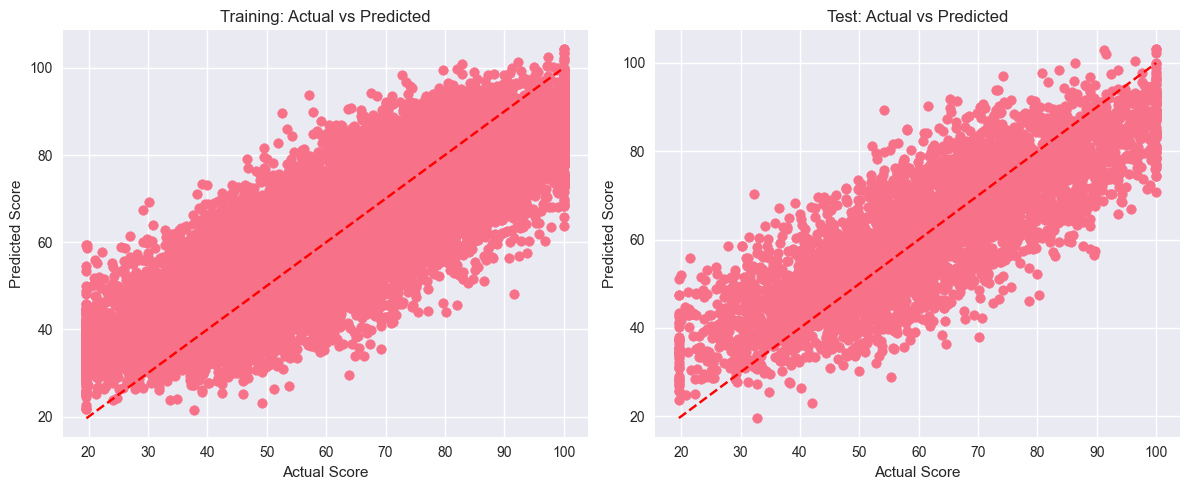

In [83]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_train, y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Training: Actual vs Predicted')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Test: Actual vs Predicted')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')

plt.tight_layout()
plt.show()


In [84]:
sample_student = pd.DataFrame([{
    'student_id': 999,
    'age': 20,
    'gender': 1,              # encoded
    'course': 2,              # encoded
    'study_hours': 6,
    'class_attendance': 90,
    'internet_access': 1,     # encoded
    'sleep_hours': 7,
    'sleep_quality': 8,
    'study_method': 1,        # encoded
    'facility_rating': 7,
    'exam_difficulty': 5
}])



In [85]:
sample_student = sample_student[X.columns]


In [86]:
sample_scaled = scaler.transform(sample_student)
sample_selected = selector.transform(sample_scaled)

prediction = model.predict(sample_selected)

print(f"🎓 Predicted Exam Score: {prediction[0]:.2f}")


🎓 Predicted Exam Score: 56.43


In [87]:
import joblib
joblib.dump(model, 'exam_score_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selector, 'feature_selector.pkl')

print("✅ Model saved successfully")


✅ Model saved successfully


In [88]:
import joblib

joblib.dump(pipeline, "exam_score_pipeline.pkl")
print("✅ Pipeline saved successfully")

✅ Pipeline saved successfully


In [89]:
df = pd.read_csv(r"C:\Users\VARSHINI\Exam_Score_Prediction.csv")


In [90]:
print(df.columns)


Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')


In [103]:
X = df.drop(["exam_score", "student_id"], axis=1)
y = df["exam_score"]


In [104]:
# Numerical columns = only int & float
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Categorical columns = everything else (object, string)
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: ['age', 'study_hours', 'class_attendance', 'sleep_hours']
Categorical columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [108]:
pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [109]:
import joblib

joblib.dump(pipeline, "exam_score_pipeline.pkl")
print("✅ Pipeline saved successfully")


✅ Pipeline saved successfully
